<a href="https://colab.research.google.com/github/hariniiy/Harini---APPLICATIONS-OF-DATAMINING/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Alcohol  Proline
0    14.23     1065
1    13.20     1050
2    13.16     1185
3    14.37     1480
4    13.24      735


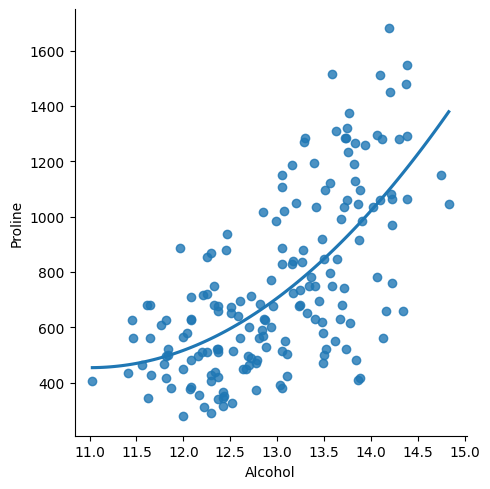

Model Score: 0.431452496313669


<ipython-input-1-937c81e90b8f>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_selected.fillna(method='ffill', inplace=True)
<ipython-input-1-937c81e90b8f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.fillna(method='ffill', inplace=True)


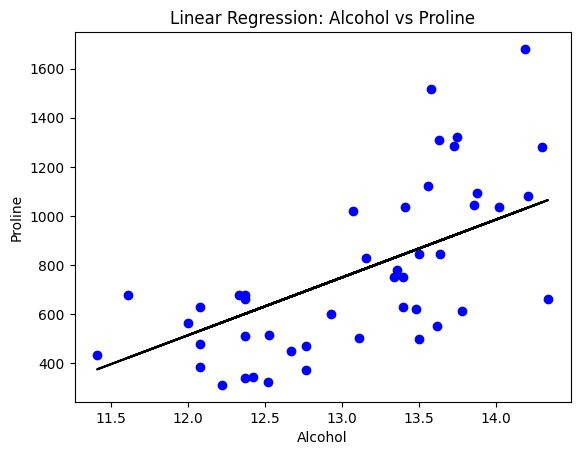

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('/content/wine.csv')

# Selecting Alcohol as independent variable and Proline as dependent variable
df_selected = df[['Alcohol', 'Proline']]
df_selected.columns = ['Alcohol', 'Proline']

# Display first 5 rows
print(df_selected.head())

# Scatter plot to visualize the relationship
sns.lmplot(x="Alcohol", y="Proline", data=df_selected, order=2, ci=None)
plt.show()

# Handling missing values
df_selected.fillna(method='ffill', inplace=True)

# Converting to numpy arrays for model training
X = np.array(df_selected['Alcohol']).reshape(-1, 1)
y = np.array(df_selected['Proline']).reshape(-1, 1)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training the Linear Regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Model performance
print("Model Score:", regr.score(X_test, y_test))

# Predictions
y_pred = regr.predict(X_test)

# Plotting the regression line
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('Linear Regression: Alcohol vs Proline')
plt.show()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

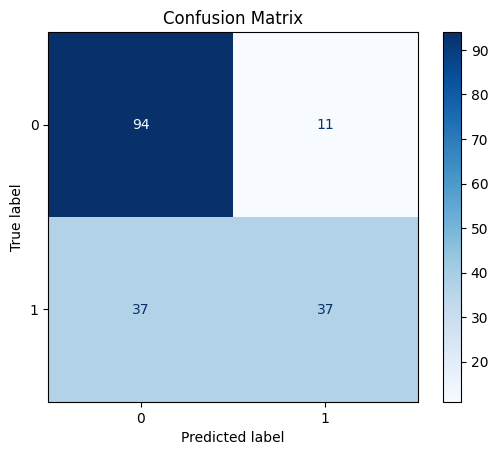

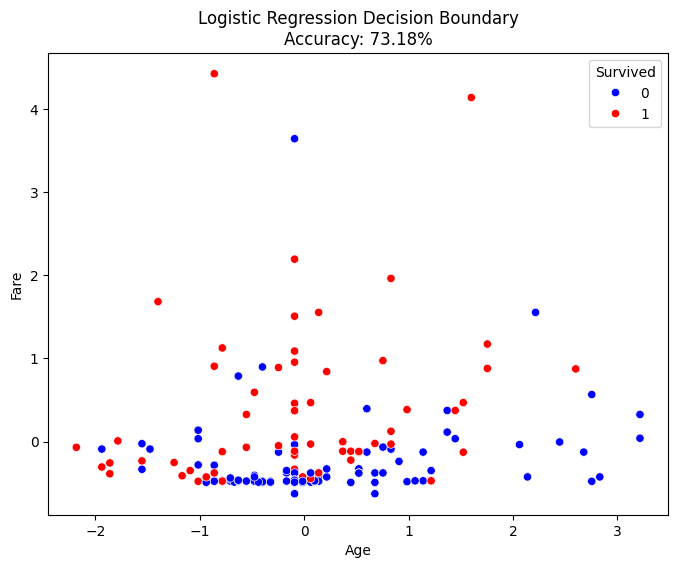

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the Titanic dataset (provide the correct file path)
titanic_df = pd.read_csv(r'/content/titanic (1).csv')

# Display basic information
print(titanic_df.head())
print(titanic_df.info())

# Selecting features and the target variable
# Using 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch' as features, and 'Survived' as the target
titanic_df = titanic_df[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Survived']].copy()

# Handling missing values (filling NaN with the median of the column)
titanic_df.loc[:, 'Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

# Splitting the data into features (X) and target (y)
X = titanic_df[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].values
y = titanic_df['Survived'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the values
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Visualizing the decision boundary with a scatter plot (using 'Age' and 'Fare' for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 1], y=X_test[:, 2], hue=y_test, palette={0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(accuracy * 100))
plt.legend(title="Survived", loc="upper right")
plt.show()